In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/uas-pca-mlr/UAS_PCA dan MLR.csv


In [2]:
pd.__version__

'1.2.4'

In [3]:
data= pd.read_csv ('../input/uas-pca-mlr/UAS_PCA dan MLR.csv')
data.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1234561175,27,41394951,3,31103129,22079895,856297,0,1614127575,1,1,1,0
1,1234561810,53,18694679,3,31860046,0,599572,17479146,5405279046,1,0,1,1
2,1234561778,52,30707209,2,29518052,0,2743516,0,3282684994,1,0,1,0
3,1234561915,40,33430719,4,14739021,18639840,4534694,18489681,1747615997,1,1,1,1
4,1234561363,55,37665545,2,5846797,0,0,11176695,5124778450,1,0,0,1


In [4]:
data.rename(columns={'Unnamed: 12':'Approved'}, inplace=True)
data.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Unnamed: 9,Unnamed: 10,Unnamed: 11,Approved
0,1234561175,27,41394951,3,31103129,22079895,856297,0,1614127575,1,1,1,0
1,1234561810,53,18694679,3,31860046,0,599572,17479146,5405279046,1,0,1,1
2,1234561778,52,30707209,2,29518052,0,2743516,0,3282684994,1,0,1,0
3,1234561915,40,33430719,4,14739021,18639840,4534694,18489681,1747615997,1,1,1,1
4,1234561363,55,37665545,2,5846797,0,0,11176695,5124778450,1,0,0,1


In [5]:
del data['Unnamed: 9']

In [6]:
del data['Unnamed: 10']

In [7]:
del data['Unnamed: 11']
data.head()

,Customer ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab Bisnis,Limit Kredit Mortgage,Approved
0,1234561175,27,41394951,3,31103129,22079895,856297,0,1614127575,0
1,1234561810,53,18694679,3,31860046,0,599572,17479146,5405279046,1
2,1234561778,52,30707209,2,29518052,0,2743516,0,3282684994,0
3,1234561915,40,33430719,4,14739021,18639840,4534694,18489681,1747615997,1
4,1234561363,55,37665545,2,5846797,0,0,11176695,5124778450,1


In [8]:
data.shape

(999, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer ID            999 non-null    int64
 1   Umur                   999 non-null    int64
 2   Income                 999 non-null    int64
 3   Product_holding        999 non-null    int64
 4   Saving                 999 non-null    int64
 5   Deposit                999 non-null    int64
 6   KK                     999 non-null    int64
 7   Tab Bisnis             999 non-null    int64
 8   Limit Kredit Mortgage  999 non-null    int64
 9   Approved               999 non-null    int64
dtypes: int64(10)
memory usage: 78.2 KB


In [10]:
data.isna().sum()

Customer ID              0
Umur                     0
Income                   0
Product_holding          0
Saving                   0
Deposit                  0
KK                       0
Tab Bisnis               0
Limit Kredit Mortgage    0
Approved                 0
dtype: int64

<AxesSubplot:>

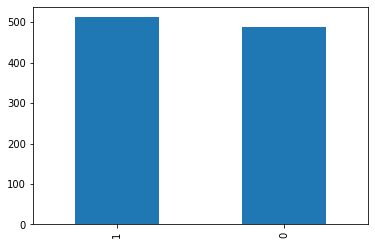

In [11]:
data['Approved'].value_counts().plot(kind = 'bar')

In [12]:
x=data.drop(['Approved'],axis=1).values
y=data['Approved'].values
print (x)
print (y)

[[1234561175         27   41394951 ...     856297          0 1614127575]
 [1234561810         53   18694679 ...     599572   17479146 5405279046]
 [1234561778         52   30707209 ...    2743516          0 3282684994]
 ...
 [1234561393         42   37730135 ...    3607066          0 5142559861]
 [1234561007         44   45789263 ...          0          0 2335293519]
 [1234561955         35   42060893 ...          0          0 5643750871]]
[0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
pca = PCA(n_components =None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
hasil_variance = pca.explained_variance_ratio_
print(hasil_variance)

[0.21342534 0.12775088 0.12054236 0.11490075 0.11029914 0.1048979
 0.10075548 0.09273307 0.01469509]


In [16]:
pca = PCA(n_components = 9)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
hasil_variance2 = pca.explained_variance_ratio_
print(hasil_variance2)

[0.21342534 0.12775088 0.12054236 0.11490075 0.11029914 0.1048979
 0.10075548 0.09273307 0.01469509]


In [17]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

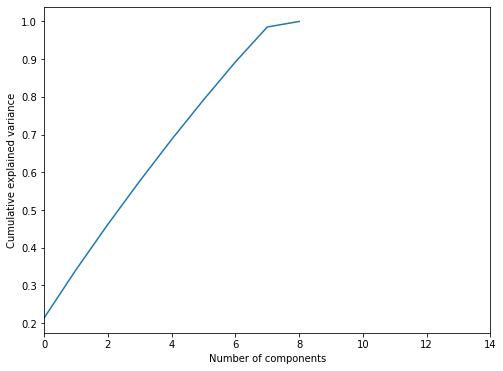

In [18]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [19]:
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

Intercept: 0.5164520743919886
Coefficients: [ 0.22110903 -0.13186947  0.16566104 -0.06065416  0.0044657  -0.21738406
  0.12452795 -0.17929674 -0.09258668]


In [20]:
y_pred = regressor.predict(x_test)
y_pred

array([ 9.86665431e-01, -1.36430003e-02,  6.95089917e-02,  4.23205098e-02,
        9.15680968e-03,  1.01095170e+00,  1.16150223e+00, -6.04794563e-03,
        9.37116354e-01,  1.12863688e+00, -2.05846550e-02,  1.21568267e+00,
        9.57038351e-01,  1.26026883e-02,  1.05536663e-02,  6.58220411e-02,
        1.32797436e-01,  8.93753996e-01,  1.05976122e+00,  9.54162622e-01,
        1.13608240e-02,  9.38673795e-01,  1.11413768e+00,  7.90920530e-01,
        9.02254273e-01,  3.57667997e-03,  4.31422068e-02,  8.11104238e-02,
        9.85296906e-01,  1.00380587e+00,  9.58657398e-02,  4.89677082e-02,
        1.09766902e+00,  8.09425950e-01,  1.22928441e+00,  1.21088834e+00,
        1.13753182e+00,  1.17200924e+00, -1.00738547e-02,  5.01671781e-03,
        1.32521110e-01, -1.56851605e-02, -3.71735066e-02,  1.14575246e+00,
       -1.11061783e-02,  1.11898161e+00,  1.20213460e+00,  1.99854612e-03,
       -3.15463651e-02,  8.95298483e-01,  1.84020735e-03,  1.23408590e+00,
        7.85331472e-01,  

In [21]:
score=r2_score(y_test,y_pred)
score

0.9462334191238582